# Temperature Forecast Project using ML

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [93]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [94]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [95]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [96]:
df['station'].fillna(df['station'].mean(),inplace=True)
df['Present_Tmax'].fillna(df['Present_Tmax'].mean(),inplace=True)
df['Present_Tmin'].fillna(df['Present_Tmin'].mean(),inplace=True)
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean(),inplace=True)
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean(),inplace=True)
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean(),inplace=True)
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean(),inplace=True)
df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean(),inplace=True)
df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean(),inplace=True)
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean(),inplace=True)
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean(),inplace=True)
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean(),inplace=True)
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean(),inplace=True)
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean(),inplace=True)
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean(),inplace=True)
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean(),inplace=True)
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean(),inplace=True)
df['Next_Tmax'].fillna(df['Next_Tmax'].mean(),inplace=True)
df['Next_Tmin'].fillna(df['Next_Tmin'].mean(),inplace=True)

In [97]:
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7752 non-null   float64
 3   Present_Tmin      7752 non-null   float64
 4   LDAPS_RHmin       7752 non-null   float64
 5   LDAPS_RHmax       7752 non-null   float64
 6   LDAPS_Tmax_lapse  7752 non-null   float64
 7   LDAPS_Tmin_lapse  7752 non-null   float64
 8   LDAPS_WS          7752 non-null   float64
 9   LDAPS_LH          7752 non-null   float64
 10  LDAPS_CC1         7752 non-null   float64
 11  LDAPS_CC2         7752 non-null   float64
 12  LDAPS_CC3         7752 non-null   float64
 13  LDAPS_CC4         7752 non-null   float64
 14  LDAPS_PPT1        7752 non-null   float64
 15  LDAPS_PPT2        7752 non-null   float64
 16  LDAPS_PPT3        7752 non-null   float64


In [99]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [100]:
df.set_index('Date',inplace=True)
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
30-06-2013,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
30-06-2013,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
30-06-2013,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
30-06-2013,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
30-06-2013,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30-08-2017,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
30-08-2017,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
30-08-2017,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4


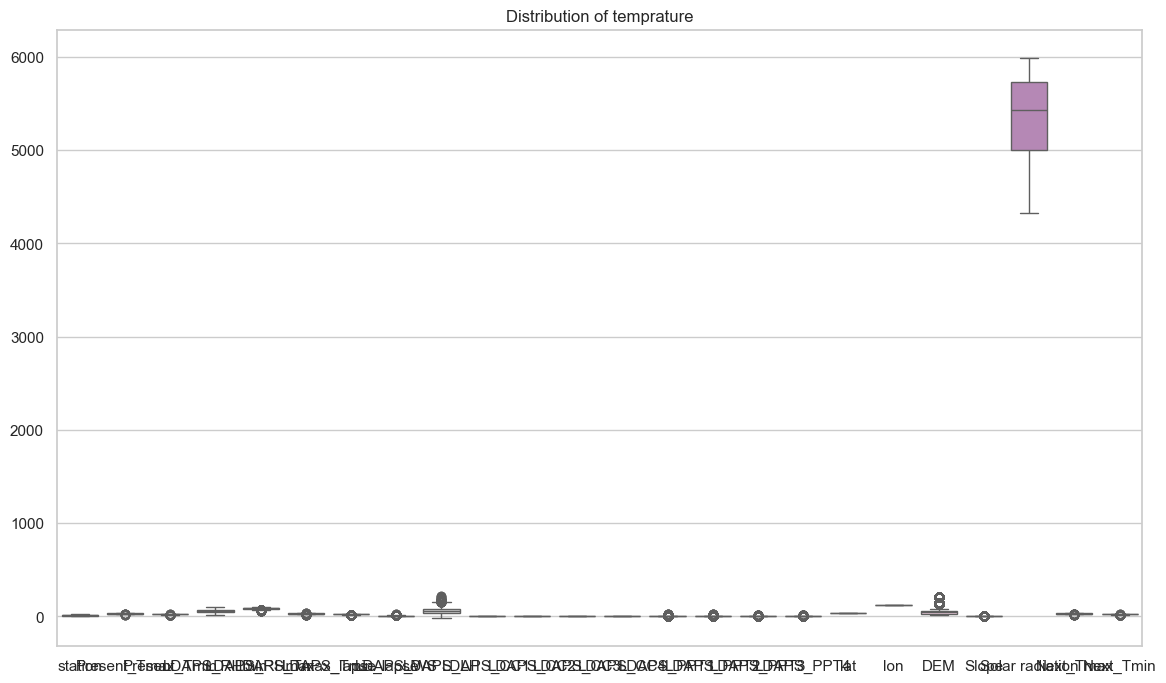

In [101]:
# box plot to show the variation of variables 
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df, palette="Set3")
plt.title('Distribution of temprature')
plt.show()

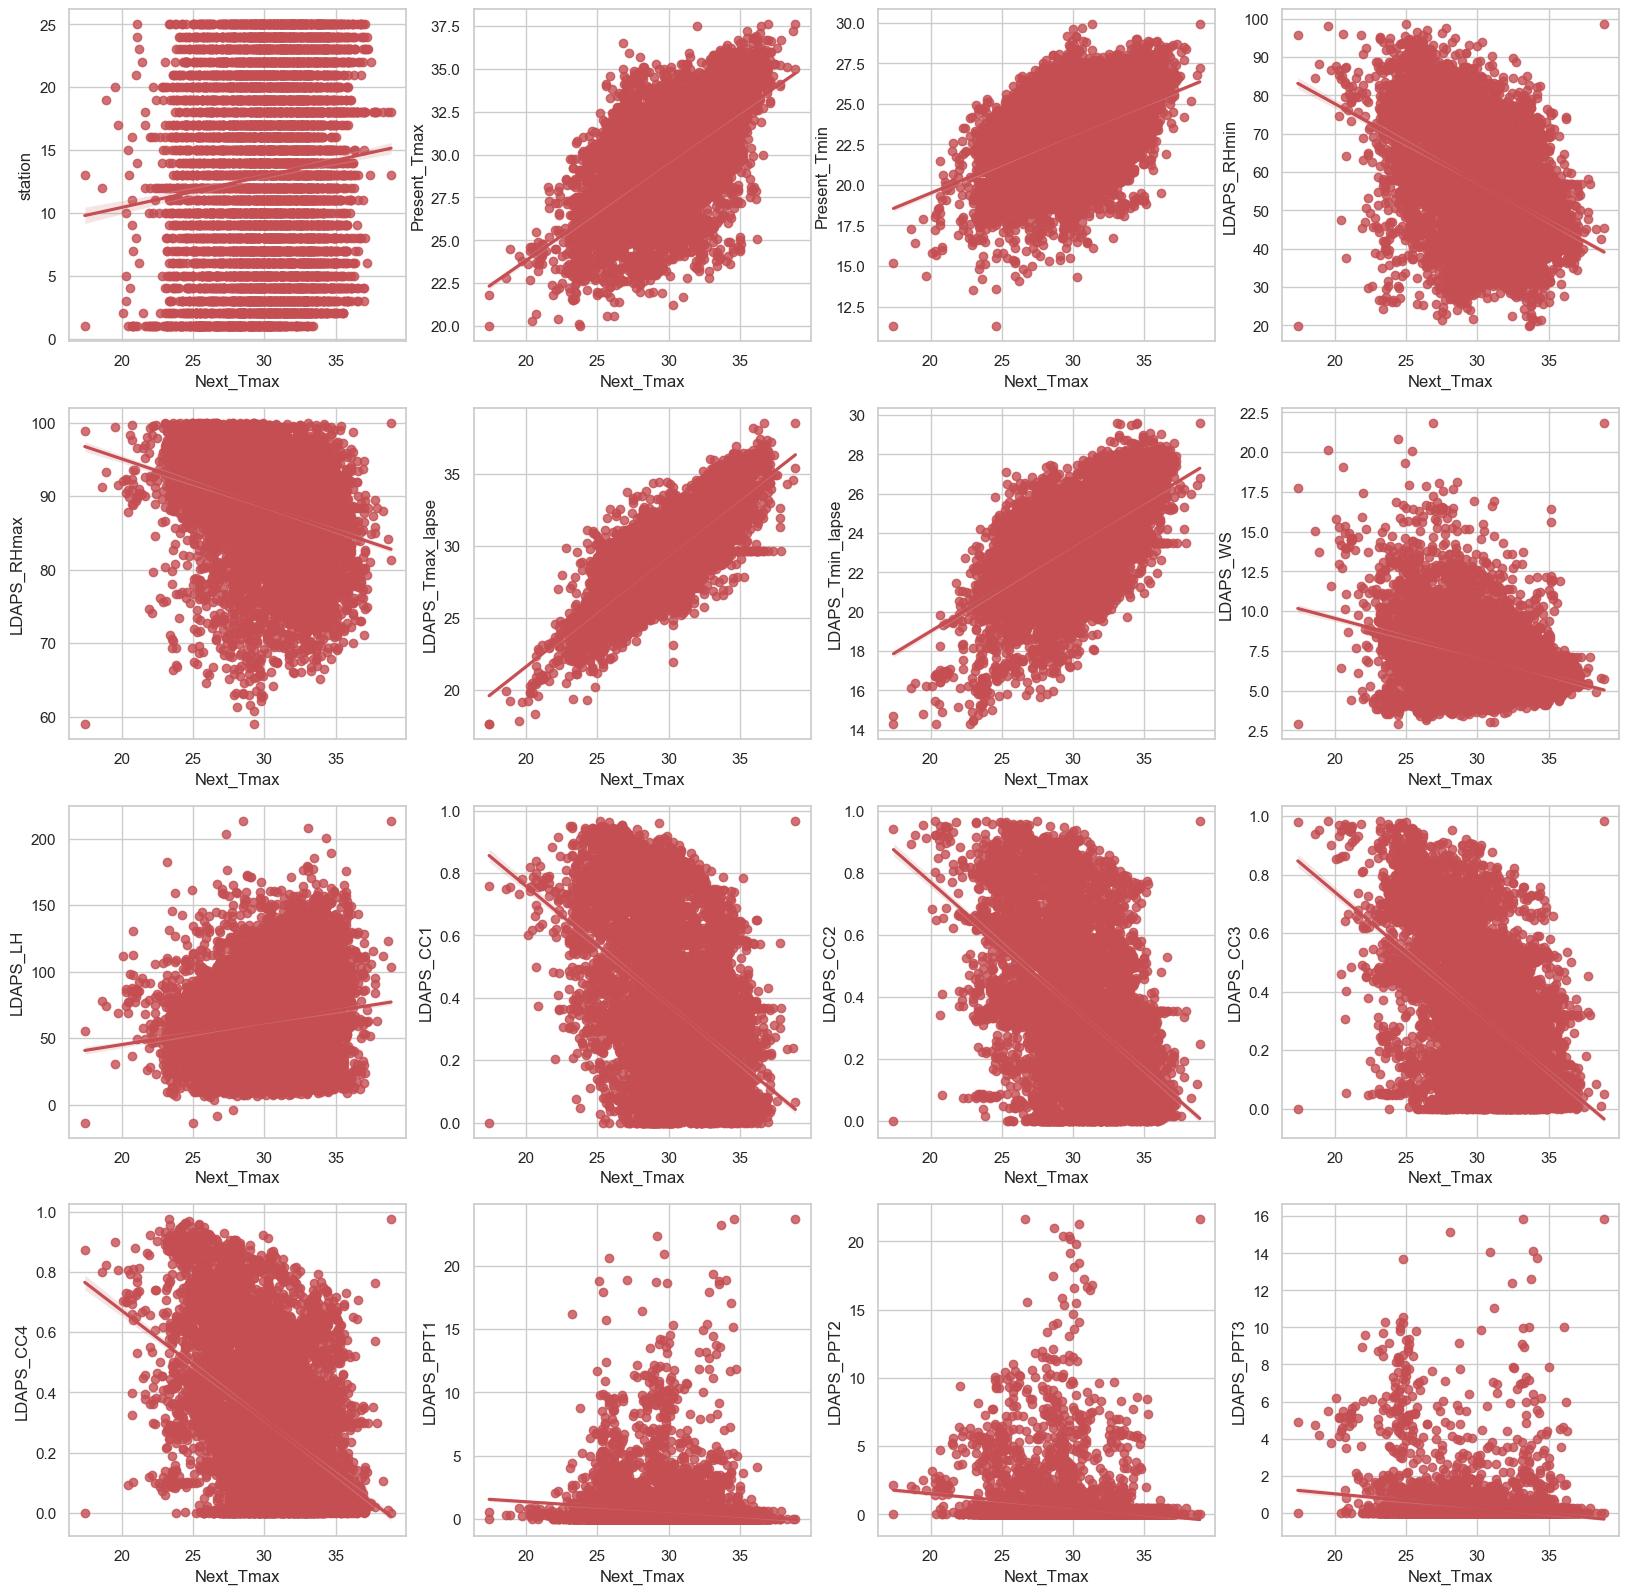

In [102]:
#Regplot
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<17:
        plt.subplot(5,4,p)
        sns.regplot(x="Next_Tmax",y=i,data=df,color="r")
        plt.xlabel("Next_Tmax")
        plt.ylabel(i)
    p+=1
plt.show()

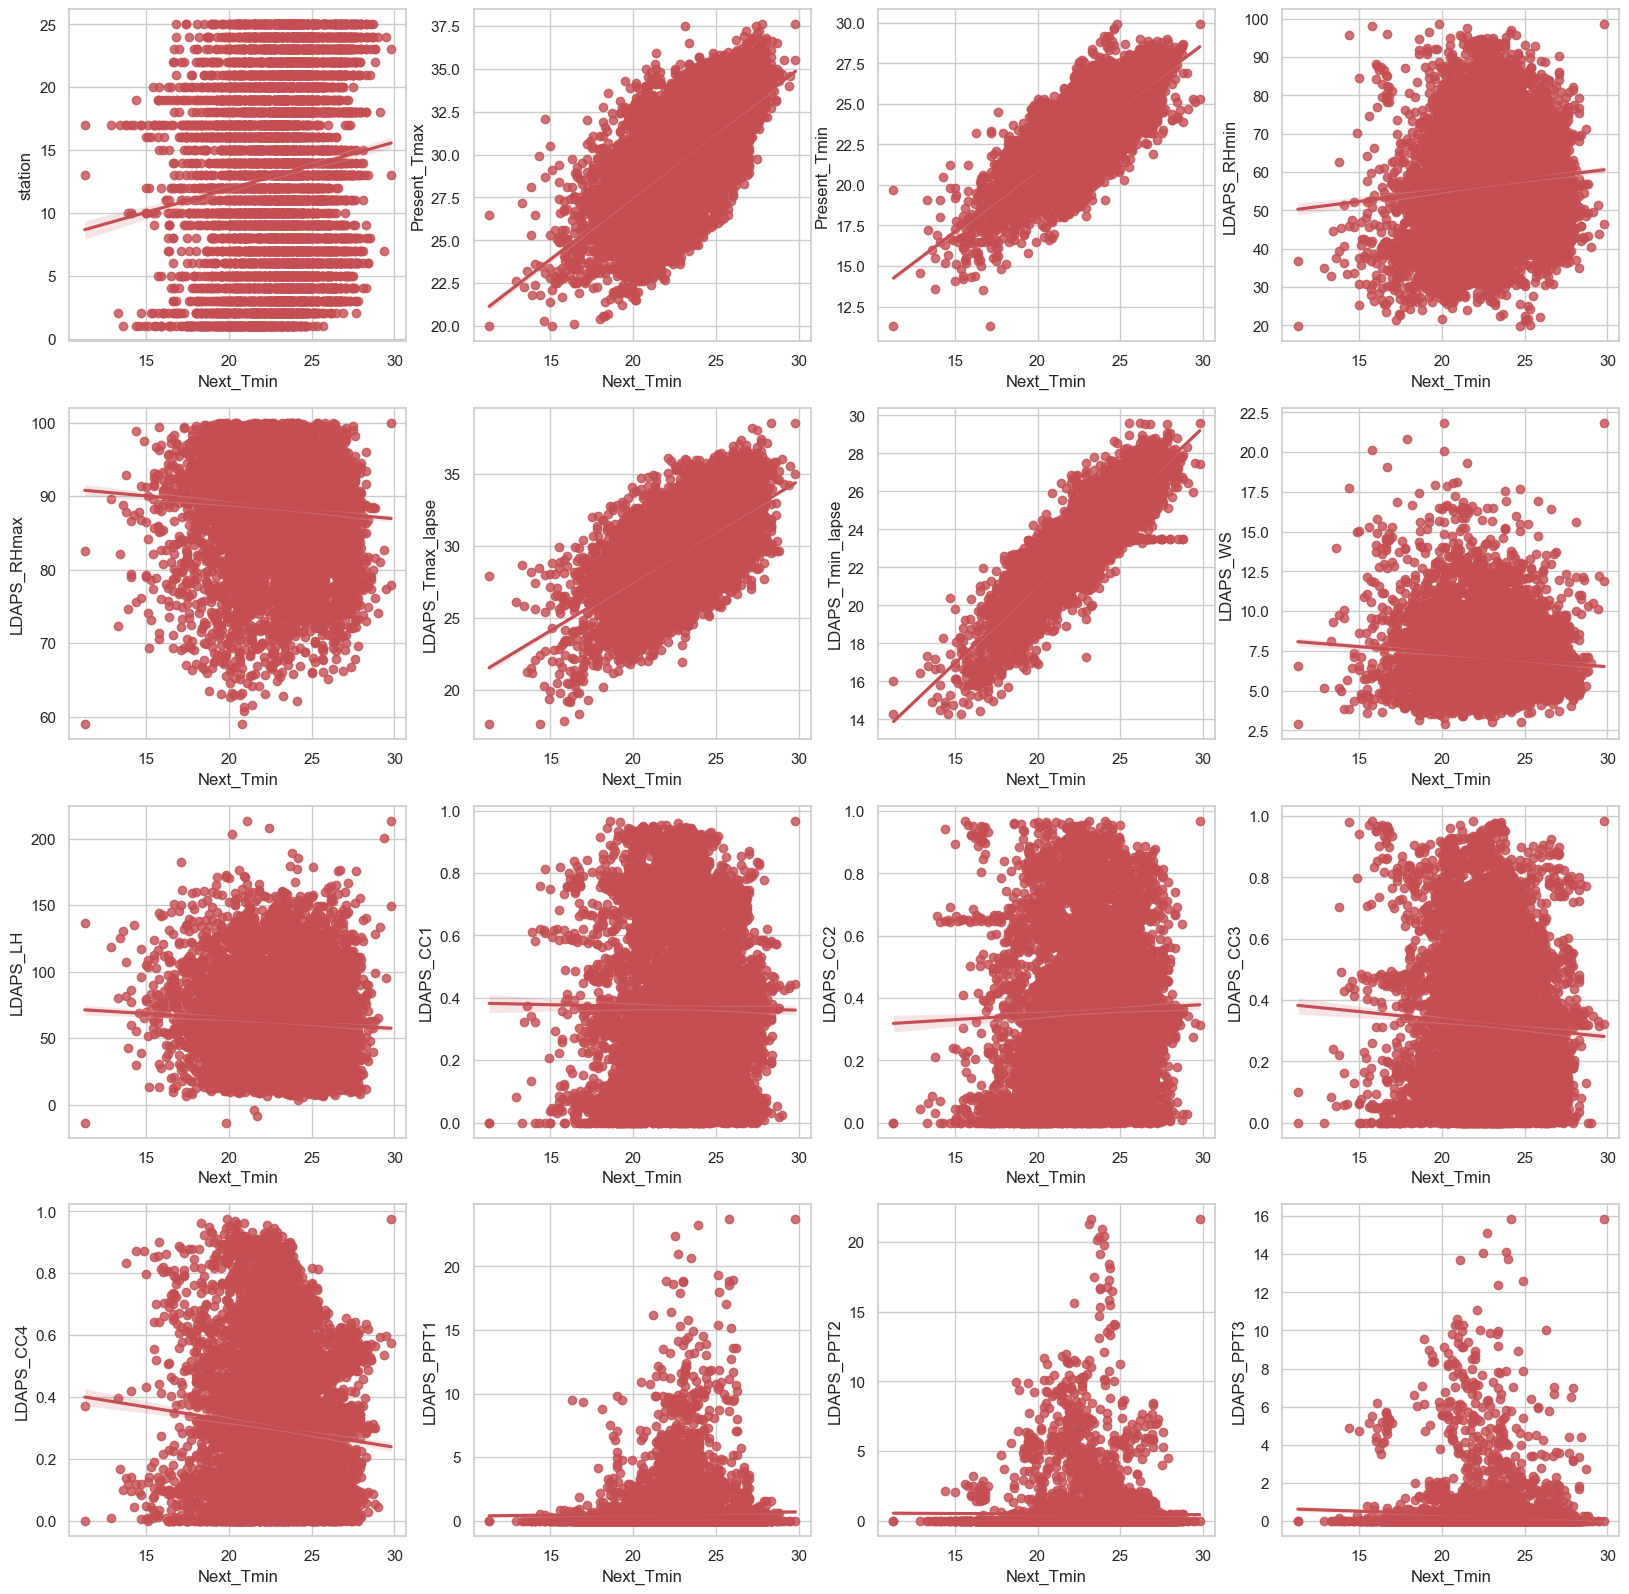

In [103]:
#Regplot
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<17:
        plt.subplot(5,4,p)
        sns.regplot(x="Next_Tmin",y=i,data=df,color="r")
        plt.xlabel("Next_Tmin")
        plt.ylabel(i)
    p+=1
plt.show()

In [104]:
# Zscore
from scipy.stats import zscore
out_features=df[['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']]
z=np.abs(zscore(out_features))    #
z

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
30-06-2013,1.664315,0.361326,0.759529,0.102515,0.383078,0.524889,0.216663,0.128382,0.206966,0.516243,...,0.276489,0.240636,0.224453,1.189286,0.005000,2.772243,1.115004,1.517935,0.376282,0.697599
30-06-2013,1.525622,0.721084,0.676296,0.308027,0.311586,0.080895,0.223848,0.646994,0.314841,0.548557,...,0.276489,0.240636,0.224453,1.189286,0.511177,0.315157,0.542158,1.229950,0.072097,0.174064
30-06-2013,1.386929,0.619608,0.031188,0.552814,0.614982,0.162936,0.451210,0.441604,1.249283,0.610450,...,0.276489,0.240636,0.224453,0.653021,0.838510,0.526218,0.723133,1.216534,0.264260,0.389744
30-06-2013,1.248236,0.754909,0.072805,0.101426,1.133054,0.031092,0.079874,0.666247,0.095997,0.583539,...,0.276489,0.240636,0.224453,1.991696,0.385280,0.297588,0.932424,1.201176,0.456422,0.550832
30-06-2013,1.109544,0.551957,0.551446,0.040098,0.248765,0.170325,0.011187,0.627154,1.354409,0.832287,...,0.276489,0.240636,0.224453,0.118743,1.807917,0.494322,0.548433,1.207205,0.296287,0.174064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30-08-2017,1.386929,2.187892,2.549048,2.056591,1.328126,1.112066,2.029679,0.436683,0.284622,1.297018,...,0.276489,0.240636,0.224453,0.149390,1.263971,0.852681,0.803915,2.093040,0.632499,1.946031
30-08-2017,1.525622,2.187892,2.299348,2.241619,1.548184,0.887662,2.047744,0.255421,0.454749,1.274658,...,0.276489,0.240636,0.224453,0.417522,1.037356,0.821213,0.755095,2.104553,0.536418,1.664127
30-08-2017,1.664315,2.221718,2.424198,2.317504,1.555342,0.570780,2.137962,0.088072,1.591397,1.224577,...,0.276489,0.240636,0.224453,0.417522,0.269384,0.779043,0.719338,2.074325,0.792634,2.227935


In [105]:
np.where(z>3)

(array([  25,   25,   26,   27,   28,   29,   30,   33,   33,   35,   36,
          37,   38,   39,   41,   43,   44,   44,   45,   46,   47,   48,
          49,  150,  151,  152,  153,  154,  155,  156,  157,  158,  159,
         160,  161,  162,  163,  164,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  194,  269,  279,  280,  282,  283,
         284,  285,  286,  288,  289,  290,  292,  294,  295,  296,  297,
         298,  299,  304,  305,  307,  308,  309,  310,  311,  312,  313,
         315,  317,  320,  321,  323,  324,  344,  375,  394,  419,  494,
         519,  525,  526,  527,  528,  529,  530,  531,  532,  533,  534,
         535,  536,  537,  538,  539,  540,  541,  542,  543,  544,  544,
         545,  546,  547,  548,  549,  554,  569,  575,  584,  594,  969,
        1324, 1424, 1475, 1476, 1478, 1481, 1491, 1493, 1494, 1494, 1652,
        1661, 1663, 1664, 1670, 1674, 1750, 1751, 1752, 1753, 1755, 1756,
        1758, 1766, 1768, 1769, 1770, 

In [106]:
df1=df[(z<3).all(axis=1)]
df1.shape

(7018, 24)

In [107]:
print("old dataframe: ",df.shape[0])
print("new dataframe: ",df1.shape[0])

old dataframe:  7752
new dataframe:  7018


In [108]:
print("data loss percentage:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage: 9.468524251805986


In [109]:
df1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
30-06-2013,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
30-06-2013,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
30-06-2013,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
30-06-2013,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
30-06-2013,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30-08-2017,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
30-08-2017,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
30-08-2017,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1


In [110]:
df1.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.108301,0.131313,-0.066481,-0.170165,0.065024,0.102952,0.018303,-0.134121,0.011267,...,-0.016513,0.000055,0.014750,-0.239311,-0.121472,-0.257324,-0.096250,-0.029410,0.105308,0.127958
Present_Tmax,0.108301,1.000000,0.611024,-0.162014,-0.296824,0.538329,0.607781,-0.109088,0.133053,-0.288936,...,-0.048275,-0.020612,-0.038005,-0.048021,0.014631,-0.168879,-0.093504,-0.074988,0.590448,0.615943
Present_Tmin,0.131313,0.611024,1.000000,0.140274,-0.029461,0.438425,0.750825,0.020529,0.004520,0.101458,...,0.081530,0.034982,-0.052566,-0.068639,-0.041977,-0.239399,-0.138819,-0.001044,0.443831,0.783380
LDAPS_RHmin,-0.066481,-0.162014,0.140274,1.000000,0.551708,-0.560247,0.128999,0.247132,-0.044824,0.576895,...,0.390129,0.270785,0.186364,0.085839,-0.097648,0.092920,0.117533,0.254460,-0.430239,0.128362
LDAPS_RHmax,-0.170165,-0.296824,-0.029461,0.551708,1.000000,-0.384637,-0.136521,0.104521,0.268871,0.422783,...,0.232328,0.123399,0.104183,0.192959,0.013274,0.172338,0.218211,0.153103,-0.302890,-0.094413
LDAPS_Tmax_lapse,0.065024,0.538329,0.438425,-0.560247,-0.384637,1.000000,0.618995,-0.231842,0.044053,-0.412573,...,-0.249209,-0.149982,-0.162475,-0.032664,0.106073,-0.163137,-0.150407,0.002827,0.802289,0.547424
LDAPS_Tmin_lapse,0.102952,0.607781,0.750825,0.128999,-0.136521,0.618995,1.000000,-0.050001,-0.131061,0.042018,...,0.009402,0.012432,-0.080917,-0.084679,-0.026592,-0.179400,-0.174663,0.101126,0.536160,0.866334
LDAPS_WS,0.018303,-0.109088,0.020529,0.247132,0.104521,-0.231842,-0.050001,1.000000,-0.045551,0.269171,...,0.120028,0.137017,0.194335,-0.009460,-0.073800,0.154174,0.121664,0.136823,-0.279694,-0.009888
LDAPS_LH,-0.134121,0.133053,0.004520,-0.044824,0.268871,0.044053,-0.131061,-0.045551,1.000000,-0.141127,...,-0.075515,0.004571,0.034785,0.121430,0.022632,0.063575,0.096238,-0.040836,0.173804,-0.042193
LDAPS_CC1,0.011267,-0.288936,0.101458,0.576895,0.422783,-0.412573,0.042018,0.269171,-0.141127,1.000000,...,0.399017,0.200385,0.190529,-0.012497,-0.016954,-0.026569,-0.031695,0.236382,-0.449744,0.011618


<Axes: >

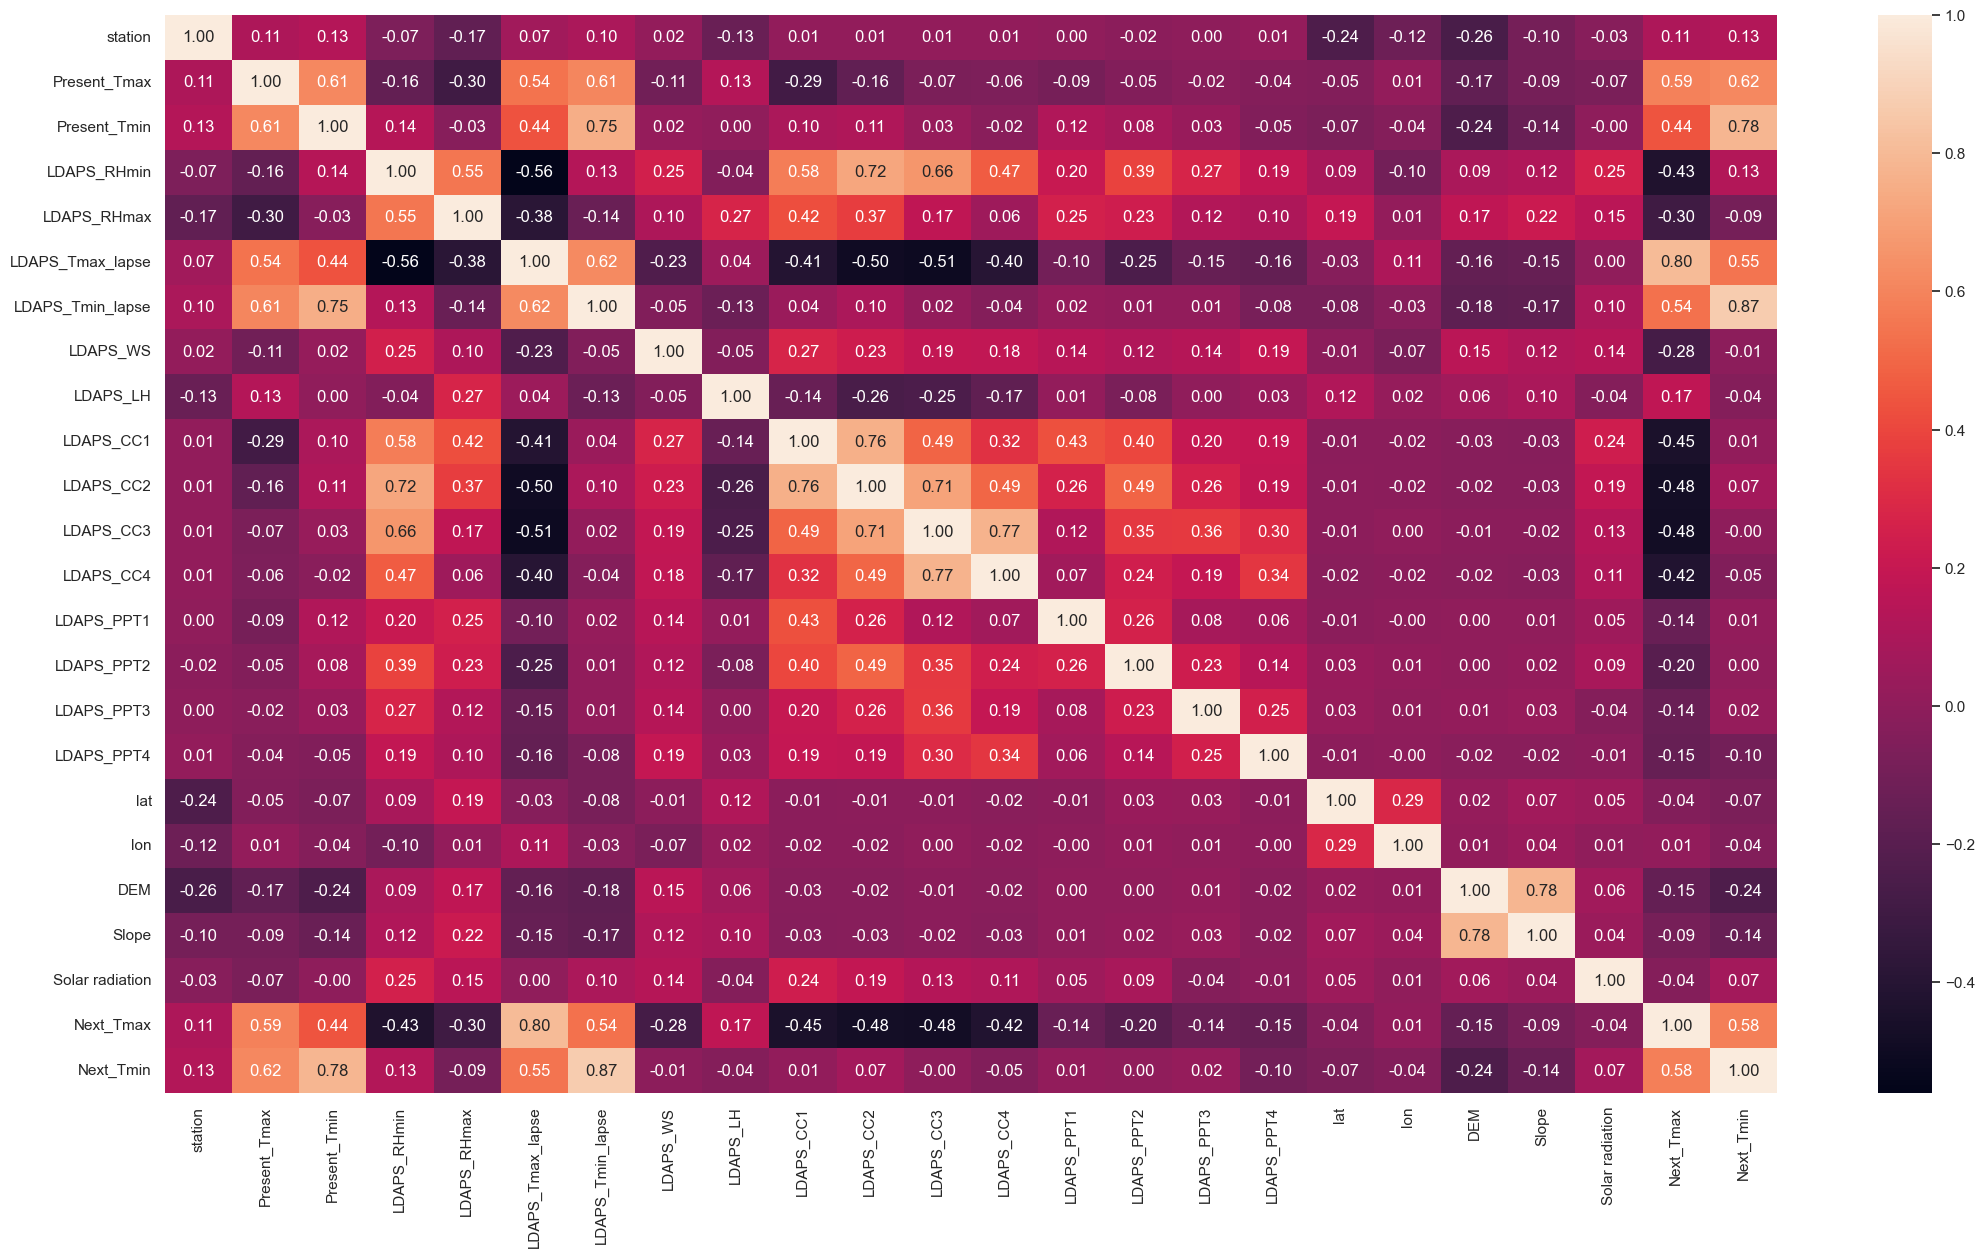

In [111]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f')

In [112]:
df.corr().Next_Tmax.sort_values()

LDAPS_CC3          -0.514680
LDAPS_CC2          -0.490756
LDAPS_CC1          -0.452541
LDAPS_CC4          -0.446319
LDAPS_RHmin        -0.437898
LDAPS_WS           -0.342729
LDAPS_RHmax        -0.283738
LDAPS_PPT3         -0.194143
LDAPS_PPT4         -0.178718
LDAPS_PPT2         -0.178383
DEM                -0.172538
LDAPS_PPT1         -0.118817
Slope              -0.102725
lat                -0.053510
lon                 0.003052
Solar radiation     0.008795
station             0.107983
LDAPS_LH            0.157616
Present_Tmin        0.471806
LDAPS_Tmin_lapse    0.586983
Present_Tmax        0.610348
Next_Tmin           0.621427
LDAPS_Tmax_lapse    0.827189
Next_Tmax           1.000000
Name: Next_Tmax, dtype: float64

In [113]:

df.corr().Next_Tmin.sort_values()

DEM                -0.246906
Slope              -0.146882
LDAPS_PPT4         -0.103682
LDAPS_WS           -0.096576
LDAPS_CC4          -0.085093
lat                -0.083533
LDAPS_RHmax        -0.071997
LDAPS_PPT3         -0.062622
LDAPS_LH           -0.055440
LDAPS_CC3          -0.054726
lon                -0.046603
LDAPS_CC1          -0.011028
LDAPS_PPT2         -0.008058
LDAPS_PPT1          0.021323
LDAPS_CC2           0.031250
LDAPS_RHmin         0.095019
Solar radiation     0.120212
station             0.128293
LDAPS_Tmax_lapse    0.586868
Next_Tmax           0.621427
Present_Tmax        0.622741
Present_Tmin        0.796670
LDAPS_Tmin_lapse    0.880176
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

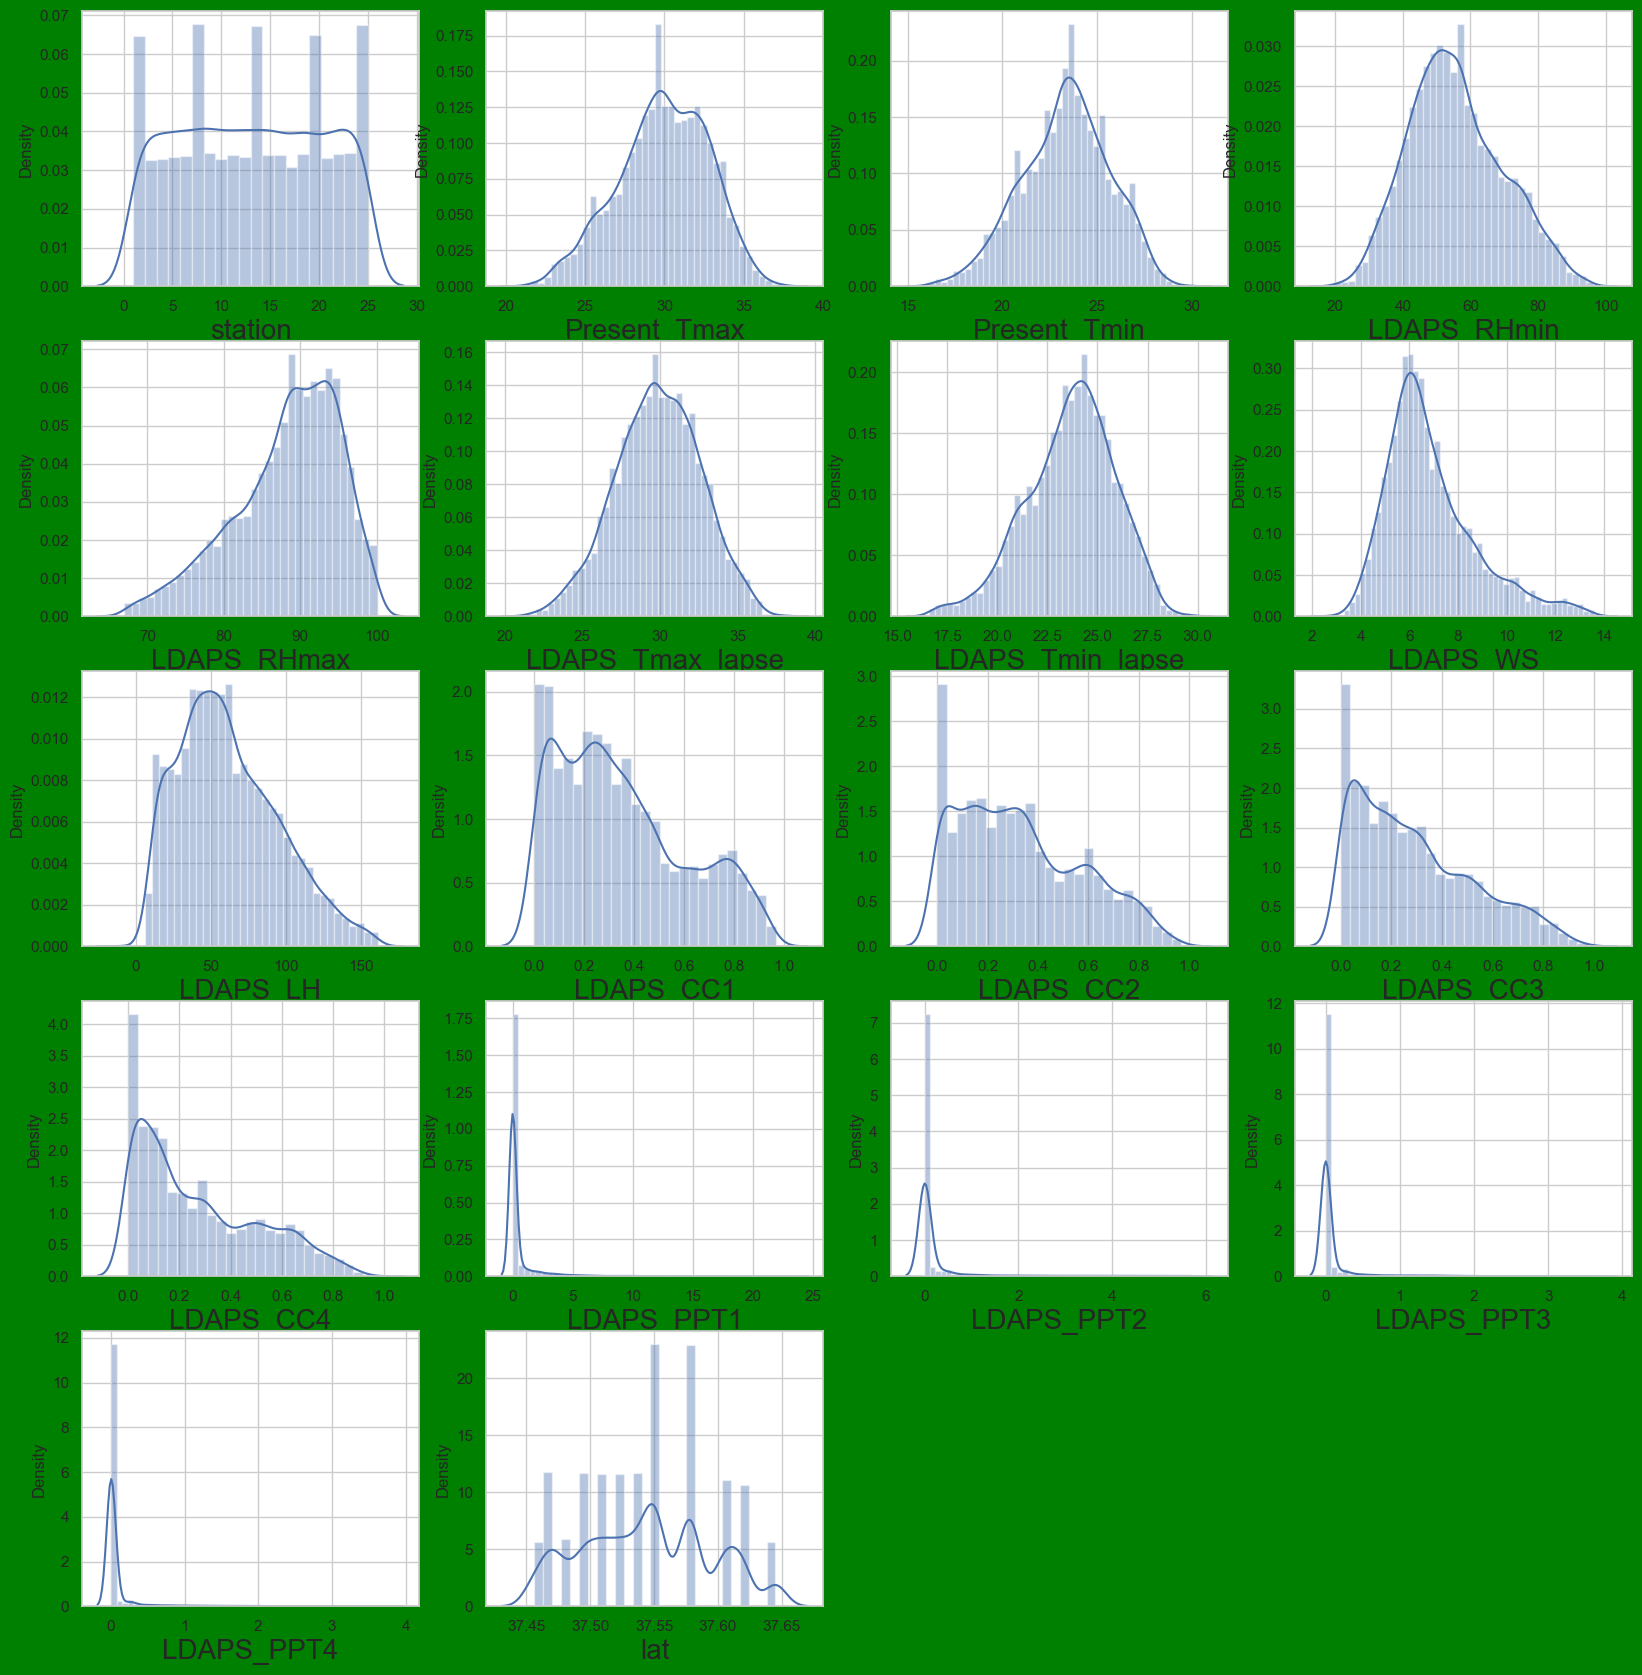

In [114]:
plt.figure(figsize=(20,25),facecolor="green")
plotnumber=1
for column in df1:
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [115]:
# Featuring the x and y
x=df1.drop(['Next_Tmax','Next_Tmin'],axis=1)
y1=df1['Next_Tmax']
y2=df1['Next_Tmin']
print("feature dimensions",x.shape)
print("label dimension",y1.shape)
print("label dimension",y2.shape)

feature dimensions (7018, 22)
label dimension (7018,)
label dimension (7018,)


In [116]:
# Feature Scaling using Standard Scalarisation
#for evaluation of the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-1.673833,-0.429166,-0.837099,0.180104,0.420579,-0.659830,-0.296482,-0.034130,0.222684,-0.465372,...,-0.615835,-0.287189,-0.289583,-0.270097,-0.241448,1.216400,0.004764,2.824827,1.142242,1.555342
1,-1.534841,0.691437,-0.750791,-0.250674,0.346498,-0.010481,0.169938,-0.643903,-0.304956,-0.498582,...,-0.629410,-0.287189,-0.289583,-0.270097,-0.241448,1.216400,0.519467,-0.304710,-0.535947,1.260872
2,-1.395848,0.586381,-0.017174,-0.507526,-0.613639,0.077461,0.410674,-0.402410,-1.249846,-0.562193,...,-0.568346,-0.287189,-0.289583,-0.270097,-0.241448,0.676620,0.845865,-0.518651,-0.719219,1.247155
3,-1.256855,0.726456,0.025979,0.178961,1.197726,-0.063866,-0.151648,-0.666541,0.110475,-0.534535,...,-0.601752,-0.287189,-0.289583,-0.270097,-0.241448,2.024069,0.393930,-0.286901,0.957345,1.231451
4,-1.117863,0.516343,-0.621329,0.030461,0.281400,-0.279767,-0.078921,-0.620576,1.382956,-0.790184,...,-0.450035,-0.287189,-0.289583,-0.270097,-0.241448,0.138840,1.812503,-0.486320,-0.542303,1.237616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,1.106019,-2.390223,-2.390640,-2.232960,-1.440721,-0.755374,-2.430580,-0.150801,-1.579998,-1.177817,...,-1.152549,-0.287189,-0.289583,-0.270097,-0.241448,0.138840,0.619897,-0.649546,-0.493085,-2.106656
7014,1.245012,-2.600336,-2.563256,-1.844340,-0.654697,-1.160276,-2.652420,-0.602678,0.605133,-1.124460,...,-1.096150,-0.287189,-0.289583,-0.270097,-0.241448,-0.670829,1.197370,-0.730434,-0.817431,-2.140541
7015,1.384005,-2.320185,-2.692718,-2.085422,-1.352619,-1.289234,-2.216139,-0.396624,0.301208,-1.267806,...,-1.171125,-0.287189,-0.289583,-0.270097,-0.241448,-0.131049,-1.250611,-0.849570,-0.801026,-2.136942
7016,1.522997,-2.320185,-2.433794,-2.279570,-1.580650,-1.048692,-2.235266,-0.183499,-0.446429,-1.244826,...,-1.171125,-0.287189,-0.289583,-0.270097,-0.241448,-0.400939,-1.024644,-0.817672,-0.751587,-2.148714


In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,1.229838,station
1,2.682303,Present_Tmax
2,3.012494,Present_Tmin
3,6.001854,LDAPS_RHmin
4,2.225693,LDAPS_RHmax
5,6.869713,LDAPS_Tmax_lapse
6,6.680476,LDAPS_Tmin_lapse
7,1.210525,LDAPS_WS
8,1.524156,LDAPS_LH
9,3.326239,LDAPS_CC1


# Modelling
for finding the best random state 

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


In [119]:
# finding the best random state
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y1_train)
    pred=lr.predict(x_test)
    acc=r2_score(y1_test,pred)   # to find difference between the predicted and actual value
    if acc>maxacc: 
        maxacc=acc
        maxrs=i
print("Maximum score is",maxacc,"on Random state",maxrs)

Maximum score is 0.7634448710274131 on Random state 26


In [120]:
# finding the best random state
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y2_train)
    pred=lr.predict(x_test)
    acc=r2_score(y2_test,pred)   # to find difference between the predicted and actual value
    if acc>maxacc: 
        maxacc=acc
        maxrs=i
print("Maximum score is",maxacc,"on Random state",maxrs)

Maximum score is 0.8329964171219609 on Random state 65


In [121]:
#Cross Validation score
from sklearn.model_selection import cross_val_score

In [122]:
ACLR=LinearRegression()
LR.fit(x_train,y1_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2 score: ',r2_score(y1_test,pred_LR))
print('R2 score on training data: ',r2_score(y1_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y1_test,pred_LR))
print('Mean Squared Error',mean_squared_error(y1_test,pred_LR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y1_test,pred_LR)))

R2 score:  0.7256875592985357
R2 score on training data:  74.81326367831522
Mean Absolute Error 1.1432372882635005
Mean Squared Error 2.3200357600442785
Root mean squared Error 1.5231663599371799


In [123]:
score =cross_val_score(LR,x,y1,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score for first model: ",(r2_score(y1_test,pred_LR)-score.mean())*100)

[0.66768663 0.660317   0.68339114 0.68713322 0.62476526]
0.6646586484591649
Difference between R2 score and cross validation score for first model:  6.102891083937079


In [124]:
LR=LinearRegression()
LR.fit(x_train,y2_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2 score: ',r2_score(y2_test,pred_LR))
print('R2 score on training data: ',r2_score(y2_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y2_test,pred_LR))
print('Mean Squared Error',mean_squared_error(y2_test,pred_LR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y2_test,pred_LR)))

R2 score:  0.805250356007156
R2 score on training data:  81.73668088104532
Mean Absolute Error 0.7959093043400904
Mean Squared Error 1.054949571448444
Root mean squared Error 1.0271073806805422


In [125]:
score =cross_val_score(LR,x,y2,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score for second model: ",(r2_score(y2_test,pred_LR)-score.mean())*100)

[0.68902702 0.65014059 0.78463621 0.83298816 0.8317647 ]
0.7577113346634872
Difference between R2 score and cross validation score for second model:  4.753902134366883


In [126]:
# hence we are considering the linear regression due to high accuracy in result

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
# Hyper Parameter Tunning for first model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

param = {
    'fit_intercept': [True, False],
    'normalize': [False],  # Adding normalize as it's a parameter in LinearRegression
    'positive': [False, True],
    'copy_X': [True],  # Adding copy_X as it's a parameter in LinearRegression
    'n_jobs': [None],  # Adding n_jobs as it's a parameter in LinearRegression
}

gscv = GridSearchCV(LinearRegression(), param, cv=5)
gscv.fit(x_train, y1_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True, False],
                         'n_jobs': [None], 'normalize': [False],
                         'positive': [False, True]})

In [129]:
# Hyper Parameter Tunning for second model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

param = {
    'fit_intercept': [True, False],
    'normalize': [False],  # Adding normalize as it's a parameter in LinearRegression
    'positive': [False, True],
    'copy_X': [True],  # Adding copy_X as it's a parameter in LinearRegression
    'n_jobs': [None],  # Adding n_jobs as it's a parameter in LinearRegression
}

gscv = GridSearchCV(LinearRegression(), param, cv=5)
gscv.fit(x_train, y2_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True, False],
                         'n_jobs': [None], 'normalize': [False],
                         'positive': [False, True]})

In [130]:
gscv.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [131]:
from sklearn.linear_model import LinearRegression

Model1 = LinearRegression(fit_intercept=True)
Model2 = LinearRegression(fit_intercept=True)

In [132]:
Model1.fit(x_train,y1_train)
pred=Model1.predict(x_test)
print('r2_score: ',r2_score(y1_test,pred))
print('Mean Absolute error:',mean_absolute_error(y1_test,pred))
print('Mean Squared error:',mean_squared_error(y1_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y1_test,pred)))      

r2_score:  0.7256875592985357
Mean Absolute error: 1.1432372882635005
Mean Squared error: 2.3200357600442785
Root Mean Squared Error:  1.5231663599371799


In [133]:
Model2.fit(x_train,y2_train)
pred=Model2.predict(x_test)
print('r2_score: ',r2_score(y2_test,pred))
print('Mean Absolute error:',mean_absolute_error(y2_test,pred))
print('Mean Squared error:',mean_squared_error(y2_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y2_test,pred)))      

r2_score:  0.805250356007156
Mean Absolute error: 0.7959093043400904
Mean Squared error: 1.054949571448444
Root Mean Squared Error:  1.0271073806805422


In [134]:
import joblib
import pickle
filename='maximum_temprature.pkl'
pickle.dump(Model1,open(filename,'wb'))



In [135]:
filename='minimum_temprature.pkl'
pickle.dump(Model2,open(filename,'wb'))

In [136]:
# model for the maximum temprature
import pickle 
loaded_model1=pickle.load(open('maximum_temprature.pkl','rb'))
result=loaded_model1.score(x_test,y1_test)
print(result*100)

72.56875592985357


In [137]:
# model for the minimum temprature
import pickle 
loaded_model2=pickle.load(open('minimum_temprature.pkl','rb'))
result=loaded_model2.score(x_test,y2_test)
print(result*100)

80.5250356007156
